# Curve Fit with Multiple Variables
This curve fitting module looks at working with data that has more than one independant variable.  The scipy curve fitting will take a vector, or an array/matrix.

To get started, load up some libraries again...

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math

Create some data of two variables, and then 
Create a function with two independent variables.  I'll give it some parameters so we can play with it in curve_fit.

In [2]:
# make two variables
x0 = [x/50 for x in range(100)]
x1 = [math.sin(x/10 + math.pi) for x in range(100)]
xa=(x0,x1)

In [3]:
def rf(X,fx0,fx1):
    x0,x1=X
    rv=np.sin(np.multiply(x0,fx0)+np.sin(np.multiply(x1,fx1)))
    return rv

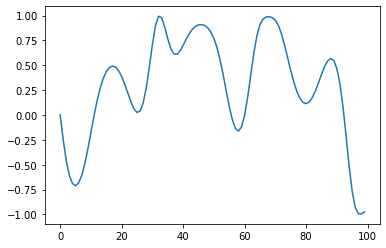

In [4]:
yv=rf((x0,x1),2,3)
plt.plot(yv)
plt.show()

That's a funny function. It is a function of two variables.To make things more interesting, the second variable is recurring. The result depends on both variables, not just one.

In [5]:
popt,pcov=opt.curve_fit(rf,xa,yv,(2,2)) # (2,2) is a starting hint
print(popt)
print(pcov)

[2. 3.]
[[ 0. -0.]
 [-0.  0.]]


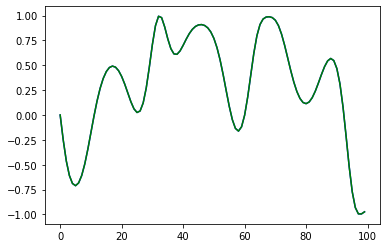

In [6]:
plt.plot(rf((x0,x1),2,3),'b')
plt.plot(rf((x0,x1),*popt),'g')
plt.show()

It worked and found the answer. It needed a hint of where to start hunting. Make a function, and explore the different hints, and what it ends up with...

In [7]:
def with_hint(h0,h1):
    popt,pcov=opt.curve_fit(rf,xa,yv,(h0,h1))
    print(popt)
    plt.plot(rf((x0,x1),2,3),'b')
    plt.plot(rf((x0,x1),*popt),'g')
    plt.show()

Now, test it out...

[1.76456234 9.9125184 ]


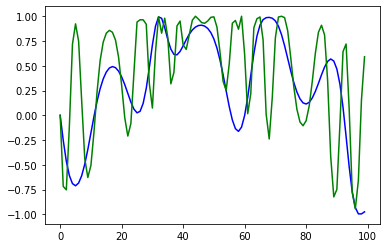

In [17]:
with_hint(2,10)

Following trend, but not accurately

[0.26317573 0.09050133]


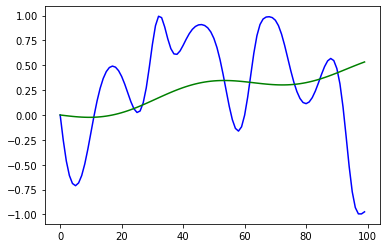

In [9]:
with_hint(0,0)

Trend does not hit all the maximum and minimum values

[50.62075144 98.8003673 ]


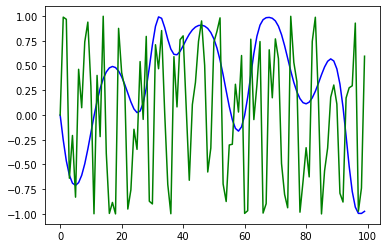

In [27]:
with_hint(50,100)

Too noisy and overshoots

[9.28158081 3.43654987]


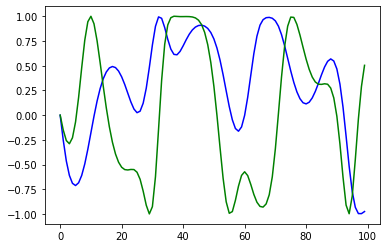

In [23]:
with_hint(10,3)

Follows the rise and falls of the curve, but stil overshoots

[2. 3.]


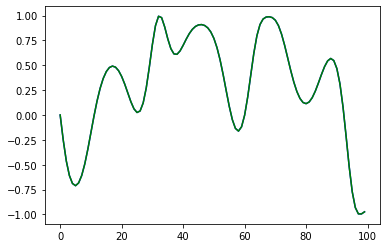

In [25]:
with_hint(4,5)

Trend matches curve

[2. 3.]


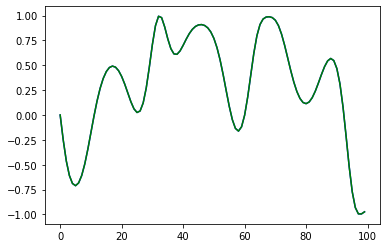

In [26]:
with_hint(2.2,3.4)

Trend matches curve. Parameters between (2-2.9, 3-3.9) seem to work

Moral of this is multivariable with repeating variables have many local minimums in the error function.  You may not find the 'best' answer. It seems ironic, but this works best if you already know the answer before you start.